In [2]:
import numpy as np
import matplotlib.pyplot as plt


## Ans _1
Plot the surface J(w1, w2) = (w1 - 10)^2 + (w2 - 10)^2. Also, generated the corresponding contour plot. Label the plots appropriately. Give a suitable title for the figure.  (2 marks)


In [91]:
def j(w):
    return (w[0]-10)**2+(w[1]-10)**2

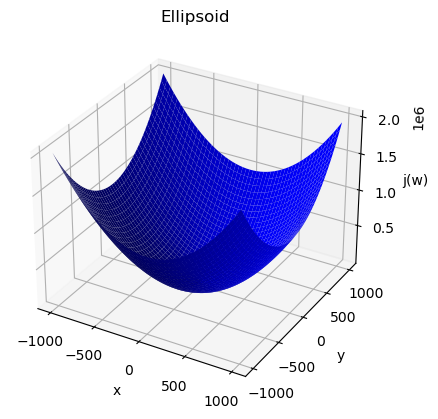

In [103]:
#Surface Plot
x=np.linspace(-1000,1000,10000)
y=np.linspace(-1000,1000,10000)
xx,yy=np.meshgrid(x,y)
zz=j(np.array([xx,yy]))
fig=plt.figure()
ax=fig.add_subplot(projection='3d')
ax.plot_surface(xx,yy,zz,color='b')
ax.set(xlabel='x',ylabel='y',title='Ellipsoid',zlabel='j(w)')
plt.show()

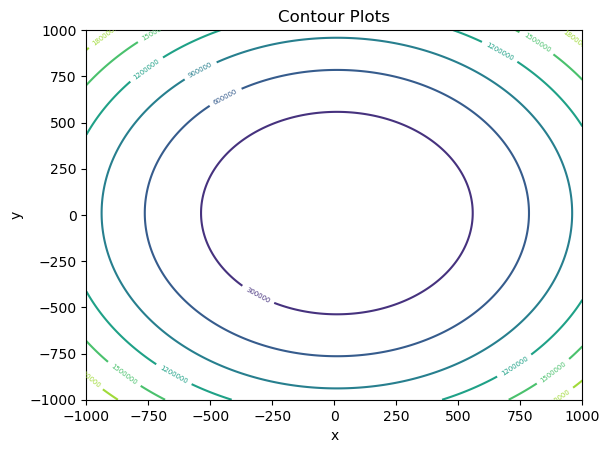

In [107]:
#Contour Plot
cp=plt.contour(xx,yy,zz)
plt.clabel(cp,fontsize=5)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Contour Plots')
plt.show()

## Ans_2 
For the function J(w) = w^2 + (54/w), implement the following methods: (a) bracketing method (choose you own a, b, n). (b) Use the bracketed value to get to the critical point employing interval halving method and (c) identify the critical point using Newton-Raphson method and (d) verify the result manually using the optimality criteria (post this write-up as well in .jped/.png etc). (8 marks, 2 each)

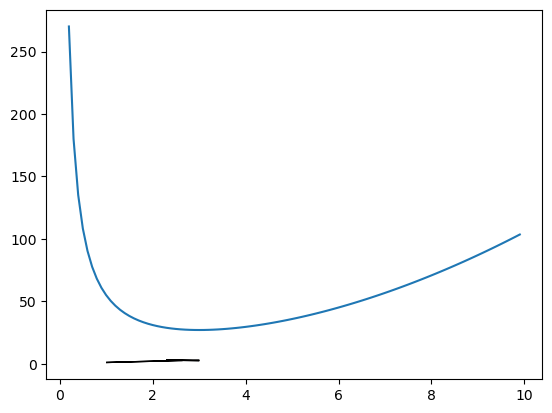

In [9]:
def j(w):
    return w**2+54/w
w=np.arange(0.2,10,0.1)
plt.plot(w,j(w))
plt.arrow(x=1,y=1, dx=2, dy=2,head_width=1,head_length=0.5,length_includes_head=True)
plt.show()

In [4]:
#(a) Bracketing method
def BK(j,a,b,n):
    del_w=(b-a)/n
    w_1=a
    w_2=w_1+del_w
    w_3=w_2+del_w
    while j(w_1)<=j(w_2) or j(w_3)<=j(w_2):
        w_1=w_2
        w_2=w_3
        w_3=w_2+del_w
        if w_3>b:
            print('Opps! No Min exists inside (a,b).')
            print('Minimum will be at the end points')
            w_1=a
            w_2=b
            break
    return w_1,w_2

print(f'We get by bracketing\n\t\t\t a:{BK(j,1,6,12)[0]},b:{BK(j,1,6,12)[1]}')

We get by bracketing
			 a:2.6666666666666665,b:3.083333333333333


In [5]:
#(b)Interval Halving 
#Now we have from above 
a,b=BK(j,1,6,12)
def IH(j,a,b):
    w_m=(a+b)/2  #mid point
    L=b-a   #length of the interval
    epsilon=10**(-5) #tolarence
    w_1=a+L/4  
    w_2=b-L/4
    while abs(L)>epsilon:
        if j(w_1)<j(w_m):
            b=w_m
            w_m=w_1
        else:
            if j(w_2)<j(w_m):
                a=w_m
                w_m=w_2
            else:
                a=w_1
                b=w_2
        L=b-a
        w_1=a+L/4
        w_2=b-L/4
    #print(L)   
    print('Critical point of function is:',w_m) 

IH(j,a,b)

Critical point of function is: 3.000001271565755


In [120]:
#(c) Newton_rafson Method
def dj(w):     #derivative of j
    return 2*w-54/(w**2)
def d2j(w):    #Second derivative of j
    return 2+108/(w**3)
def NR(j,dj,d2j):
    w_k=1 #initial guess
    epsilon=10**-5 #tolerance
    i=0
    while abs(dj(w_k))>epsilon:
        w_k=w_k-dj(w_k)/d2j(w_k)
        i+=1
    print('Critical point of function will be:',w_k,'\nNumber of iterations:',i)
NR(j,dj,d2j)

Critical point of function will be: 2.999999931328473 
Number of iterations: 6


In [66]:
#(d) Mnnualy we get that 3 is the critical point for the given function.


## ANS_3
 Use the code developed for Question 2 to find the critical point of the function f(w) = sin (w) in the interval [0,pi]  and verify the result manually using the optimality criteria (post this write-up  in .jped/.png etc). Plot the optimal points found by both methods. (5 marks , 3 +2)


In [78]:
def f(w):
    return np.sin(w)
def df(w):
    return np.cos(w)
def d2f(w):
    return -np.sin(w)


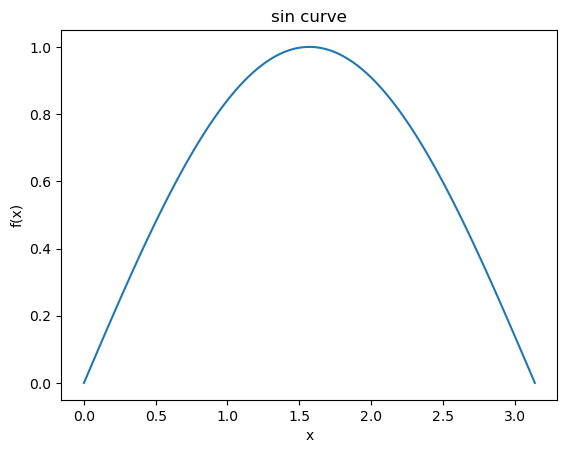

In [128]:
x=np.linspace(0,np.pi,100)
plt.plot(x,f(x))
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('sin curve')
plt.show()

In [106]:
BK(f,0,np.pi,50)

Opps! No Min exists inside (a,b).
Minimum will be at the end points


(0, 3.141592653589793)

In [ ]:
# Above the function dosen't have any minimum inside the (0,pi) and  we know that 
# it has minimum at 0 and pi in the [0,pi]. 

In [80]:
NR(f,df,d2f)  # Newton rafson Method Gives a critical point at which function attains maximum.

Critical point of function will be: 1.5707963267954879


In [124]:
np.pi/2==1.5707963267948966

True